## MULTICLASS CLASSIFICATION OF IRIS SPECIES

### ROSHAN AVINASH

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


from warnings import filterwarnings
filterwarnings(action='ignore')

In [3]:
iris_data = load_iris()
iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
iris['species'] = pd.Categorical.from_codes(iris_data.target, iris_data.target_names)
iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species'],
      dtype='object')

In [4]:
print(iris.shape)

(150, 5)


In [5]:
print(iris.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [5]:
#Checking for null values
print(iris.isna().sum())
print(iris.describe())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [6]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [14]:
n = len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [15]:
n1 = len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)

No of Virginica in Dataset: 50


In [16]:
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Setosa in Dataset: 50


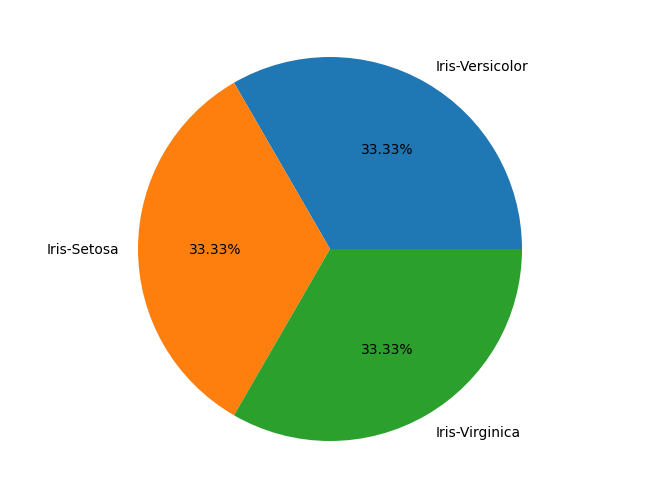

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Iris-Versicolor', 'Iris-Setosa', 'Iris-Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [20]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

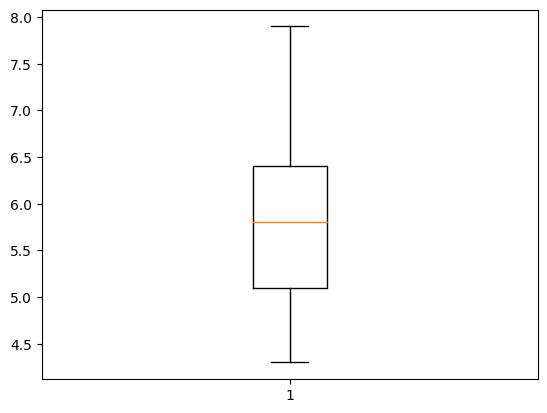

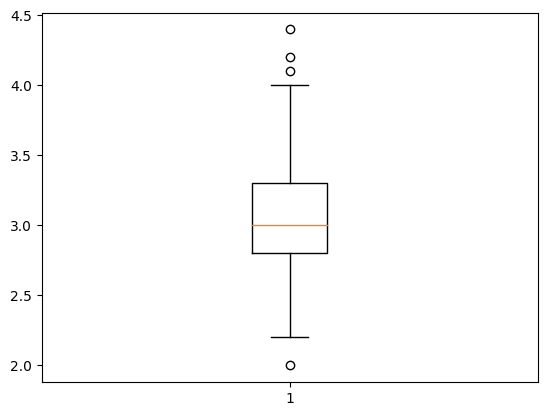

In [21]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['SepalLengthCm']])
plt.figure(2)
plt.boxplot([iris['SepalWidthCm']])
plt.show()

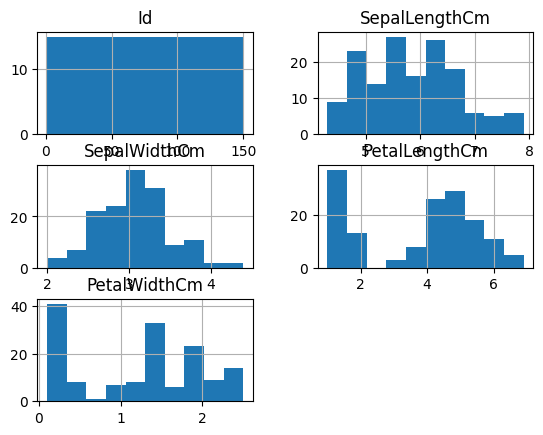

In [22]:
iris.hist()
plt.show()

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

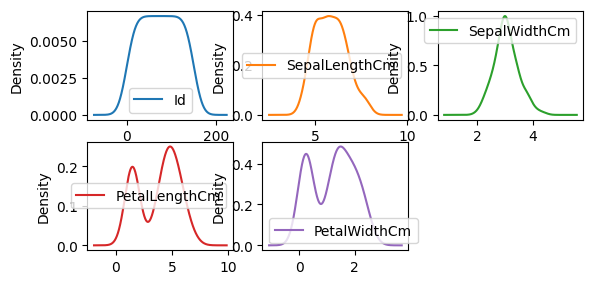

In [23]:
iris.plot(kind ='density',subplots = True, layout =(3,3),sharex = False)

Id                  Axes(0.125,0.53;0.168478x0.35)
SepalLengthCm    Axes(0.327174,0.53;0.168478x0.35)
SepalWidthCm     Axes(0.529348,0.53;0.168478x0.35)
PetalLengthCm    Axes(0.731522,0.53;0.168478x0.35)
PetalWidthCm        Axes(0.125,0.11;0.168478x0.35)
dtype: object

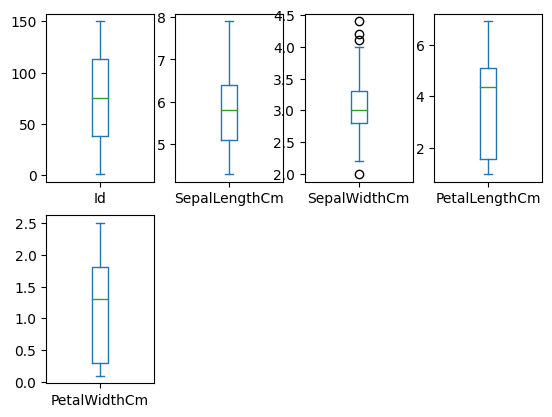

In [31]:
iris.plot(kind ='box',subplots = True, layout =(2,4),sharex = False)

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

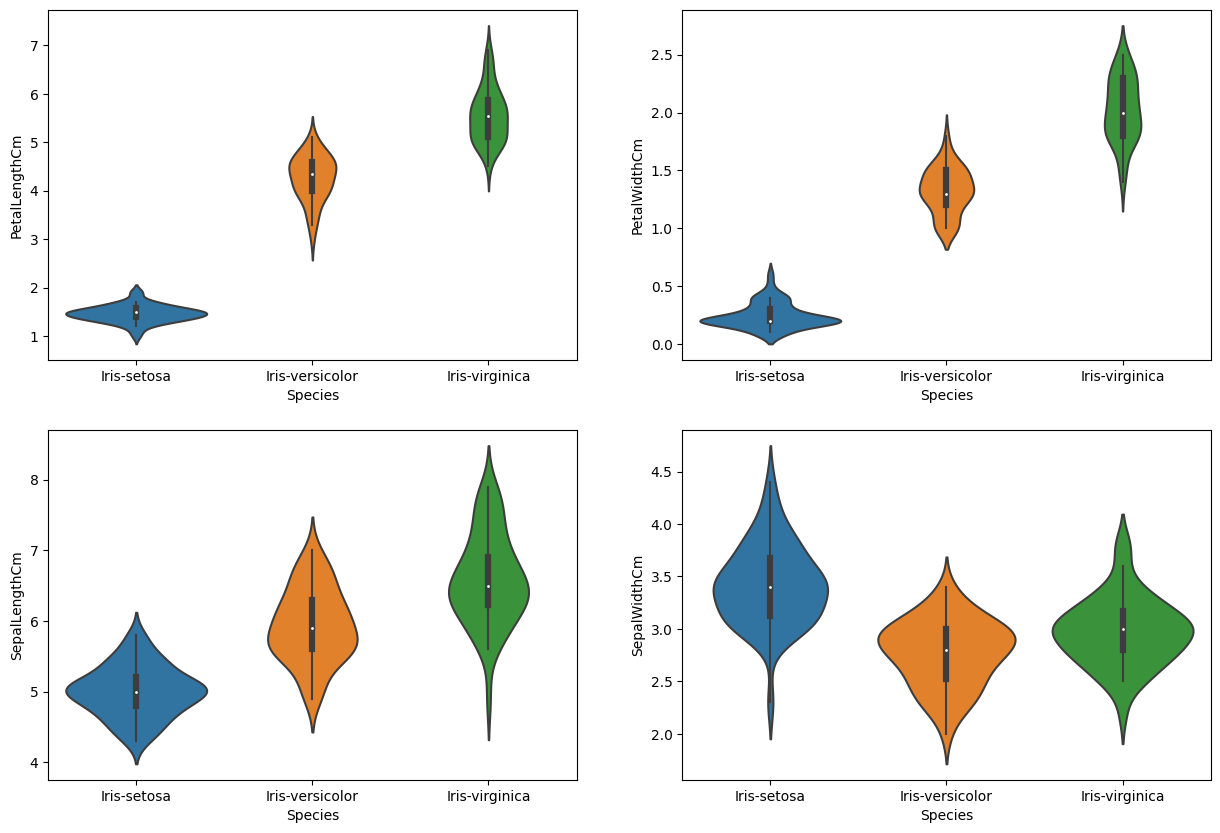

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

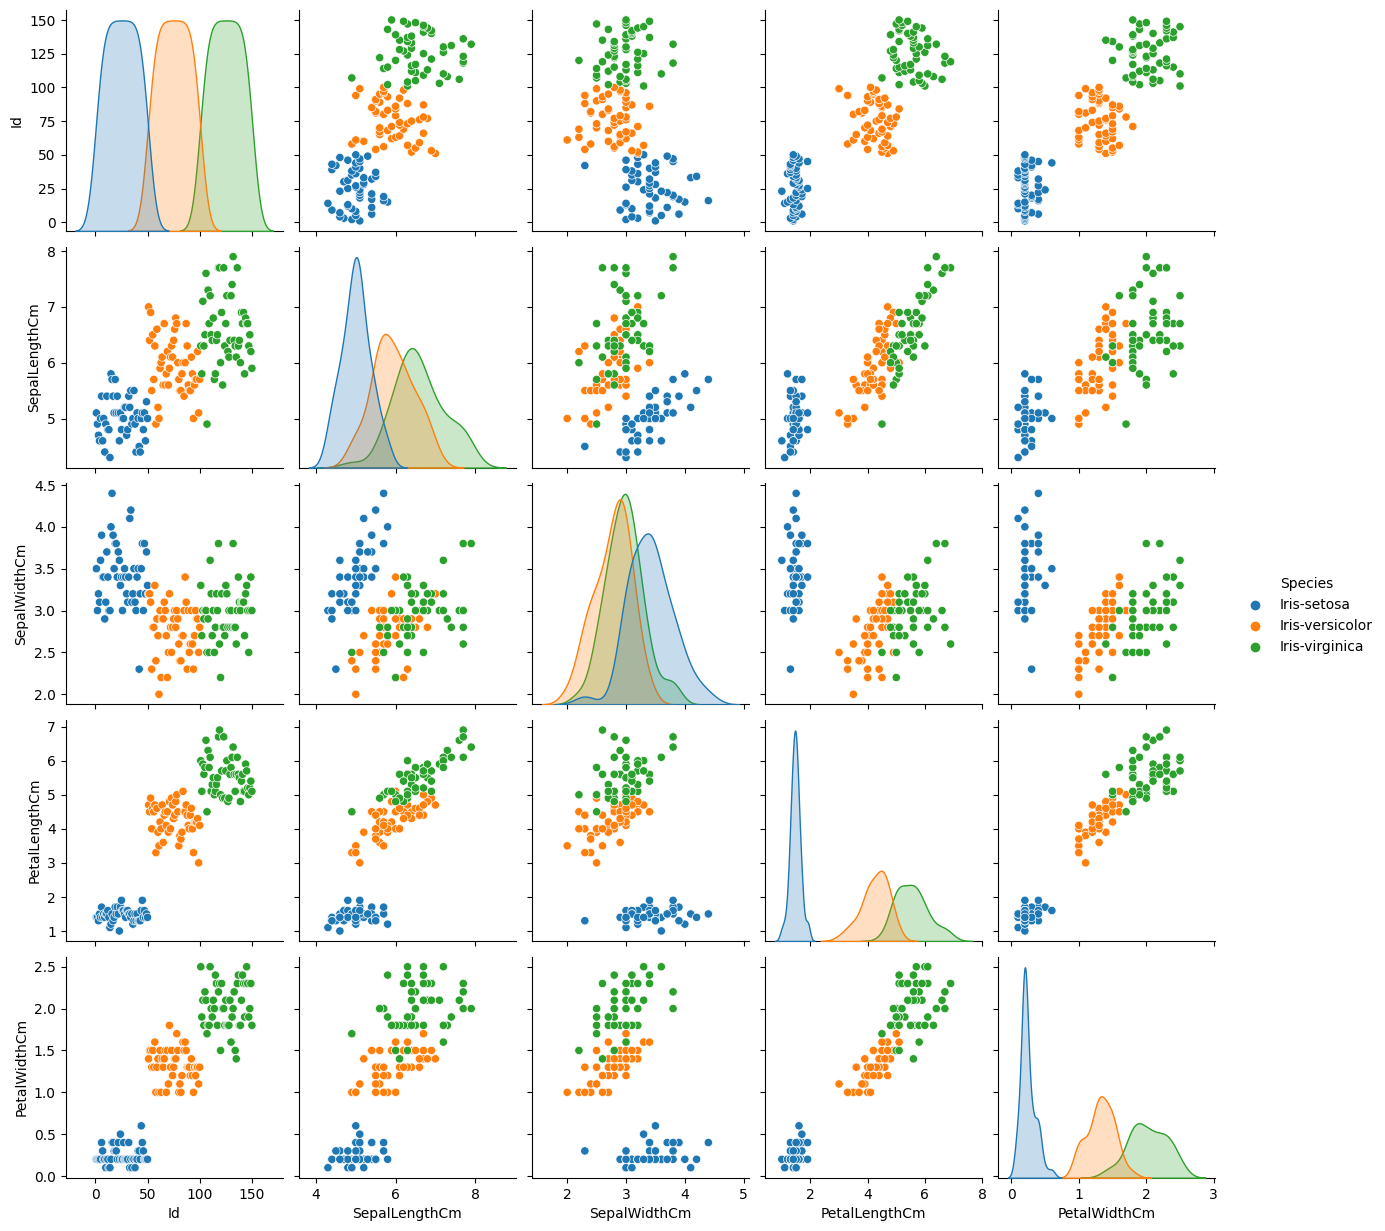

In [33]:
sns.pairplot(iris,hue='Species');

In [68]:
iris1 = iris.copy()
species_mapping = {'setosa': 1, 'versicolor': 2, 'virginica': 3}
iris1['species'] = iris1['species'].map(species_mapping)


In [72]:
X = iris1.drop(columns=['species'])
y = iris1['species']
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      1
1      1
2      1
3      1
4   

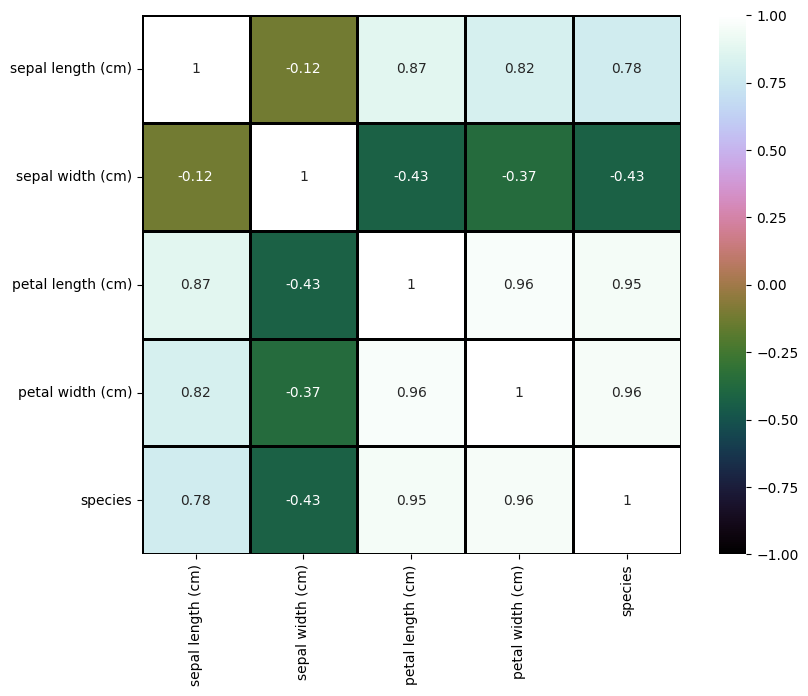

In [70]:
#Heat Maps
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.heatmap(iris1.corr(),annot=True,cmap='cubehelix',linewidths=1,linecolor='k',square=True,mask=False, vmin=-1, vmax=1,cbar_kws={"orientation": "vertical"},cbar=True)

In [73]:
#Correlation 
corr_mat = iris1.corr()
print(corr_mat)

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
species                     0.782561         -0.426658           0.949035   

                   petal width (cm)   species  
sepal length (cm)          0.817941  0.782561  
sepal width (cm)          -0.366126 -0.426658  
petal length (cm)          0.962865  0.949035  
petal width (cm)           1.000000  0.956547  
species                    0.956547  1.000000  


In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [74]:
# Split the data into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shape of the splits to verify
print("train_X shape:", train_X.shape)
print("test_X shape:", test_X.shape)
print("train_y shape:", train_y.shape)
print("test_y shape:", test_y.shape)


train_X shape: (105, 4)
test_X shape: (45, 4)
train_y shape: (105,)
test_y shape: (45,)


In [76]:
# Initialize and fit the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(train_X, train_y)

LogisticRegression(max_iter=200)

In [77]:
# Predict the labels for the test set
prediction = model.predict(test_X)

# Evaluate the model's accuracy
accuracy = metrics.accuracy_score(test_y, prediction)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [80]:
# Print the classification report
classification_report = metrics.classification_report(test_y, prediction)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



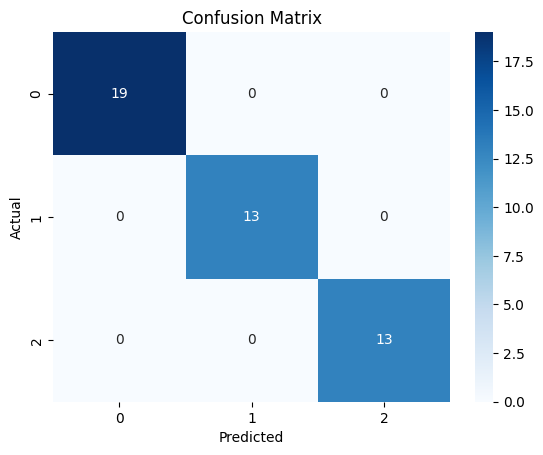

In [79]:
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(test_y, prediction)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [81]:
#Using Support Vector
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 1.0


In [82]:
#Using KNN Neighbors
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 1.0


In [83]:
#Using GaussianNB
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9777777777777777


In [84]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

Accuracy Score: 1.0


In [85]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.947,0.947,0.947,0.947,0.921]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.947,Logistic Regression
0.947,Support Vector Machines
0.947,Naive Bayes
0.947,KNN
0.921,Decision Tree


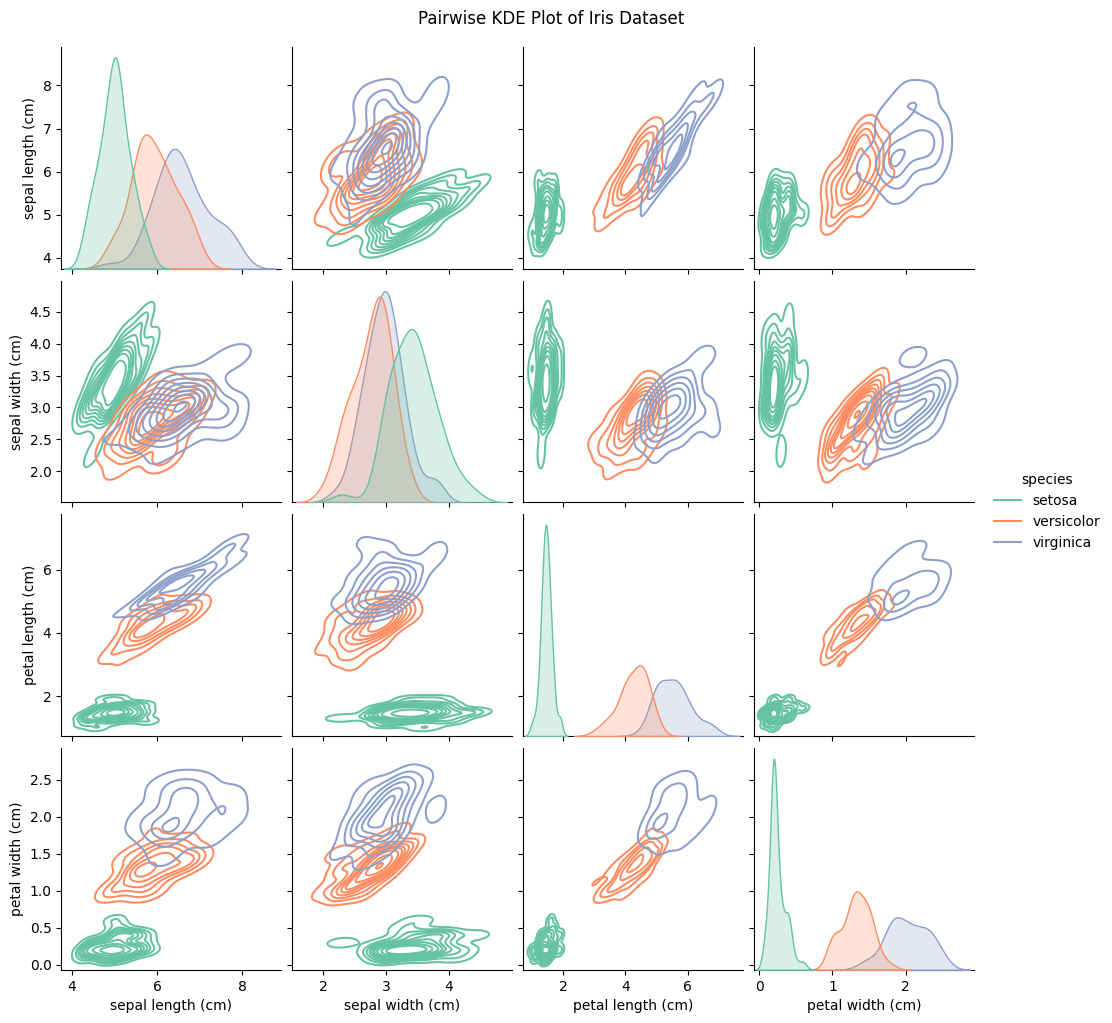

In [86]:
# Pairwise KDE plot
sns.pairplot(iris, hue='species', kind='kde', palette="Set2")
plt.suptitle("Pairwise KDE Plot of Iris Dataset", y=1.02)
plt.show()


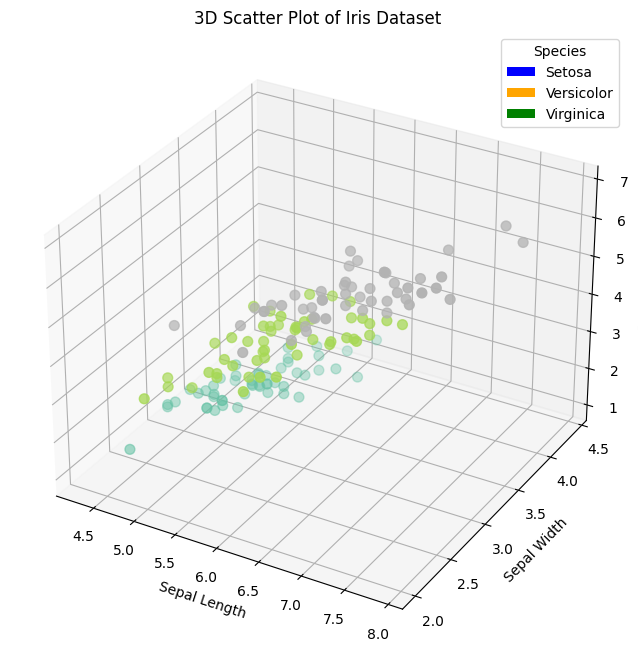

In [89]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create a mapping for species to numerical values and colors
species_mapping = {'setosa': 1, 'versicolor': 2, 'virginica': 3}
colors = {1: 'blue', 2: 'orange', 3: 'green'}  # You can choose any colors you prefer

# Add a numerical representation of species to the DataFrame
iris['species_num'] = iris['species'].map(species_mapping)

# 3D Scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'], iris['petal length (cm)'], 
                     c=iris['species_num'], cmap='Set2', s=50)

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('3D Scatter Plot of Iris Dataset')

# Create custom legend
legend_elements = [Patch(facecolor='blue', label='Setosa'),
                   Patch(facecolor='orange', label='Versicolor'),
                   Patch(facecolor='green', label='Virginica')]
ax.legend(handles=legend_elements, title='Species', loc='upper right')

plt.show()
